In [ ]:
"""
Some manual review is required here (exclude bads and the like). I had to go back to this after segmenting when bad channels where most obvious, but im sure a keen eye could save themselves pain.
"""

In [4]:
import mne

In [5]:
data_dir = "Processed"

BADS = [['T3'], ['O1'], [], ['F3', 'Cz'], ['F3']]

In [10]:
p_num = 2

In [11]:
raw = mne.io.read_raw_fif(f"{data_dir}/P{p_num}/P{p_num}-raw.fif", preload=True)
events = mne.read_events(f"{data_dir}/P{p_num}/P{p_num}_eve.fif")
start = events[0, 0] / raw.info['sfreq']
end = 5 + (events[-1, 0] / raw.info['sfreq'])
print(start, end)
print("Before cropping:", raw.times[-1])
raw.crop(tmin=start, tmax=end)
print("After cropping:", raw.times[-1])

low_cut = 0.1
hi_cut  = 40

raw_filt = raw.copy().notch_filter(60)
raw_filt.filter(l_freq=low_cut, h_freq=hi_cut)

Opening raw data file Processed/P2/P2-raw.fif...
    Range : 0 ... 719257 =      0.000 ...  2877.028 secs
Ready.
Reading 0 ... 719257  =      0.000 ...  2877.028 secs...
382.876 2721.092
Before cropping: 2877.028
After cropping: 2338.216
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- W

<Raw | P2-raw.fif, 8 x 584555 (2338.2 s), ~35.7 MiB, data loaded>

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


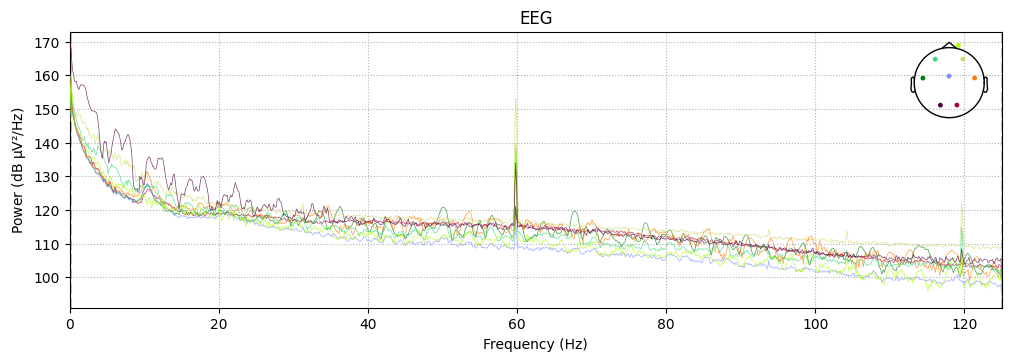

In [12]:
raw.compute_psd().plot()

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/diego/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


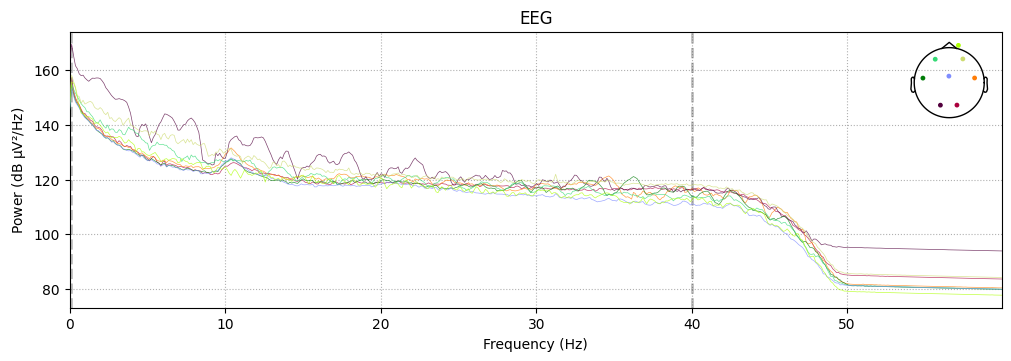

In [13]:
raw_filt.compute_psd(fmax=60).plot()

In [9]:
raw = mne.io.read_raw_fif(f"{data_dir}/P{p_num}/P{p_num}-raw.fif", preload=True)
for bad in BADS[p_num-1]:
  raw.info['bads'].append(bad)
events = mne.read_events(f"{data_dir}/P{p_num}/P{p_num}_eve.fif")
start = events[0, 0] / raw.info['sfreq']
end = 5 + (events[-1, 0] / raw.info['sfreq'])
print(start, end)
print("Before cropping:", raw.times[-1])
raw.crop(tmin=start, tmax=end)
print("After cropping:", raw.times[-1])

# raw.compute_psd().plot()

low_cut = 0.1
hi_cut  = 40

raw_filt = raw.copy().notch_filter(60)
raw_filt.filter(l_freq=low_cut, h_freq=hi_cut)
# raw_filt.compute_psd().plot()

raw_filt.save(f"{data_dir}-Better/P{p_num}/P{p_num}-filt-raw.fif", overwrite=True)
mne.write_events(f"{data_dir}-Better/P{p_num}/P{p_num}_eve.fif", events, overwrite=True)


Opening raw data file Processed/P3/P3-raw.fif...
    Range : 0 ... 544875 =      0.000 ...  2179.500 secs
Ready.
Reading 0 ... 544875  =      0.000 ...  2179.500 secs...
471.052 1858.668
Before cropping: 2179.5
After cropping: 1387.616
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Win

In [13]:


# Can only run after event codes notebook
for p_num in range(1, 6): 
  raw = mne.io.read_raw_fif(f"{data_dir}/P{p_num}/P{p_num}-raw.fif", preload=True)
  for bad in BADS[p_num-1]:
    raw.info['bads'].append(bad)
    
  events = mne.read_events(f"{data_dir}/P{p_num}/P{p_num}_eve.fif")
  start = events[0, 0] / raw.info['sfreq']
  end = 5 + (events[-1, 0] / raw.info['sfreq'])
  print(start, end)
  print("Before cropping:", raw.times[-1])
  raw.crop(tmin=start, tmax=end)
  print("After cropping:", raw.times[-1])

  # raw.compute_psd().plot()

  low_cut = 0.1
  hi_cut  = 40

  raw_filt = raw.copy().notch_filter(60)
  raw_filt.filter(l_freq=low_cut, h_freq=hi_cut)
  # raw_filt.compute_psd().plot()

  raw_filt.save(f"{data_dir}-Better/P{p_num}/P{p_num}-filt-raw.fif", overwrite=True)
  mne.write_events(f"{data_dir}-Better/P{p_num}/P{p_num}_eve.fif", events, overwrite=True)






Opening raw data file Processed/P1/P1-raw.fif...
    Range : 0 ... 670276 =      0.000 ...  2681.104 secs
Ready.
Reading 0 ... 670276  =      0.000 ...  2681.104 secs...
491.284 2412.076
Before cropping: 2681.104
After cropping: 1920.792
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- W